In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 
df1 = df.copy()

In [5]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.492726,0.501825,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250628,0.200742,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.495846,0.503522,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.490909091


In [10]:
df.describe()


,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.604727,0.605700,0.510508,0.620340,0.504229,0.635122,0.510406,0.629262,0.494641,0.570318,0.437922,0.629057,0.503970,2.220000
std,0.115566,0.264150,0.156355,0.225349,0.167108,0.221827,0.174169,0.230749,0.182911,0.185639,0.190455,0.181546,0.187579,1.183043
min,0.496970,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.527273,0.443726,0.398749,0.510717,0.401366,0.539952,0.422246,0.531346,0.426771,0.500000,0.312996,0.550930,0.418180,1.000000
50%,0.554545,0.567308,0.512742,0.651053,0.534602,0.624770,0.521687,0.603422,0.497683,0.601422,0.464278,0.630999,0.511549,2.000000
75%,0.642424,0.815416,0.632442,0.734756,0.615321,0.755718,0.588585,0.780133,0.557253,0.676146,0.534373,0.696621,0.564906,3.000000
max,0.987879,1.000000,0.844141,1.000000,0.793388,1.000000,0.893224,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['Excess Return % 3-mo (Treasury)'], df1['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0  Excess Return % 3-mo (Treasury)   50.0  0.605700  0.264150  0.037356   
 1  Excess Return % 3-mo (Treasury)  278.0  0.496887  0.250317  0.015013   
 2                         combined  328.0  0.513474  0.255084  0.014085   
 
    95% Conf.  Interval  
 0   0.530629  0.680770  
 1   0.467333  0.526441  
 2   0.485766  0.541182  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 3-mo (Treasury) - ...    0.1088
 1                              Degrees of freedom =   326.0000
 2                                               t =     2.8060
 3                           Two side test p value =     0.0053
 4                          Difference < 0 p value =     0.9973
 5                          Difference > 0 p value =     0.0027
 6                                       Cohen's d =     0.4310
 7                                       Hedge's g =     0.4300
 8           

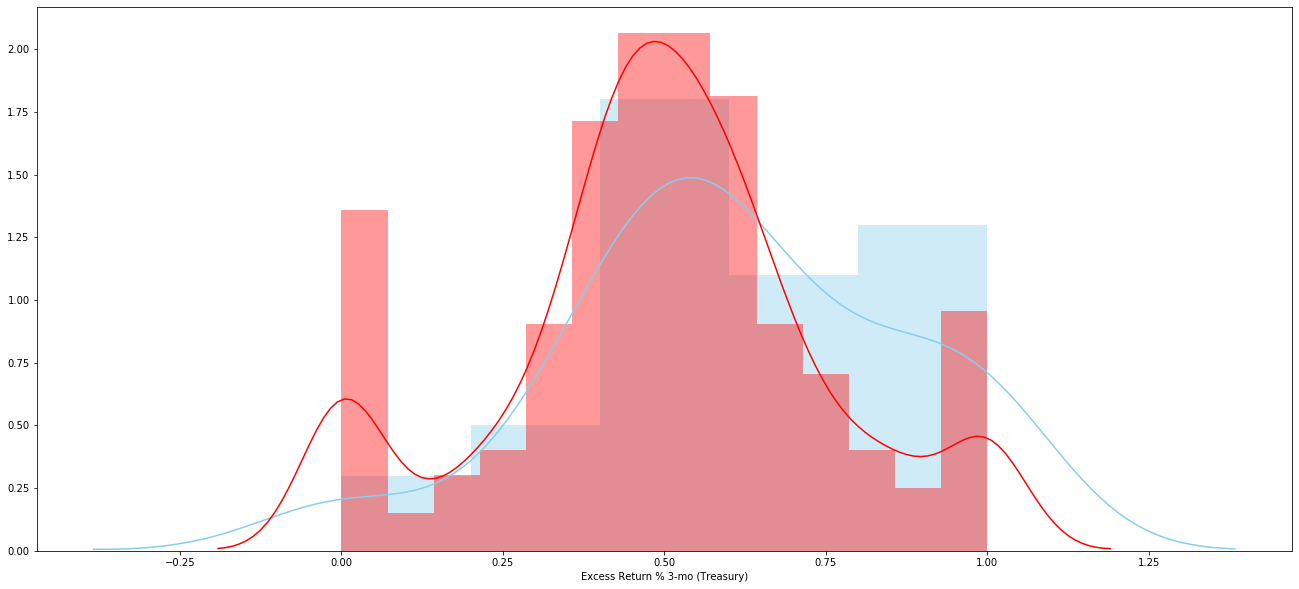

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 3-mo (Treasury)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1['Excess Return % 3-mo (Treasury)'], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['Excess Return % 3-mo (Agg)'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0  Excess Return % 3-mo (Agg)   50.0  0.510508  0.156355  0.022112   0.466073   
 1  Excess Return % 3-mo (Agg)  278.0  0.499424  0.183671  0.011016   0.477739   
 2                    combined  328.0  0.501114  0.179600  0.009917   0.481605   
 
    Interval  
 0  0.554944  
 1  0.521110  
 2  0.520623  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 3-mo (Agg) - Exces...    0.0111
 1                              Degrees of freedom =   326.0000
 2                                               t =     0.4012
 3                           Two side test p value =     0.6885
 4                          Difference < 0 p value =     0.6557
 5                          Difference > 0 p value =     0.3443
 6                                       Cohen's d =     0.0616
 7                                       Hedge's g =     0.0615
 8                               

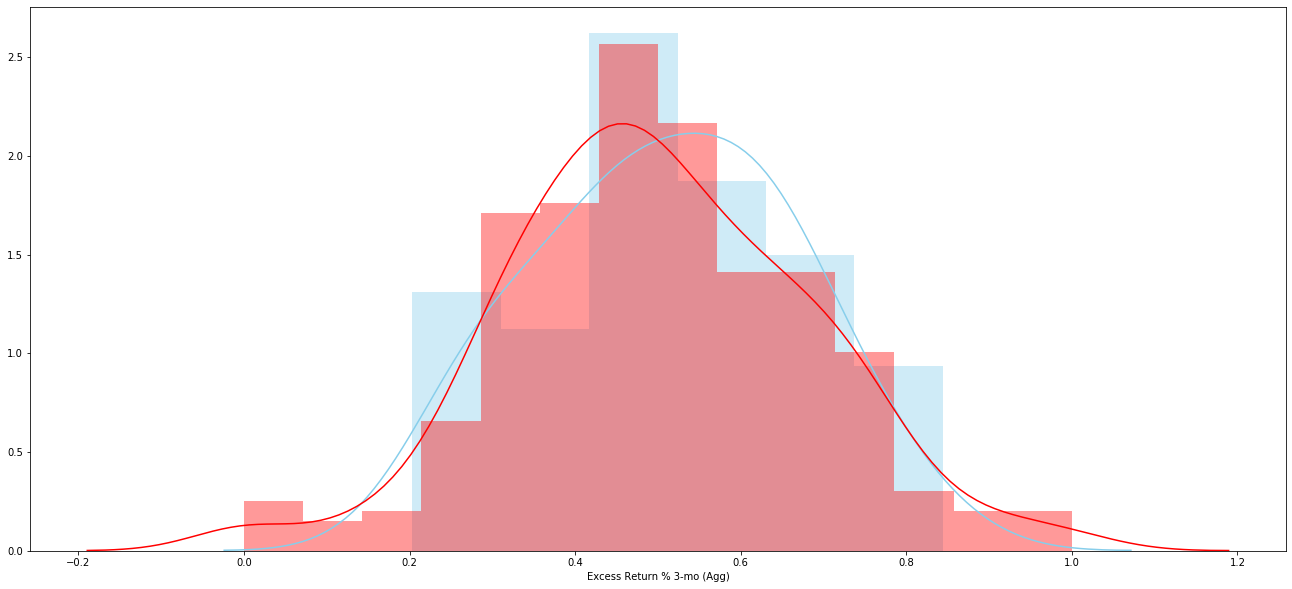

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 3-mo (Agg)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1['Excess Return % 3-mo (Agg)'], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['Excess Return % 6-mo (Treasury)'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0  Excess Return % 6-mo (Treasury)   50.0  0.620340  0.225349  0.031869   
 1  Excess Return % 6-mo (Treasury)  275.0  0.470617  0.252012  0.015197   
 2                         combined  325.0  0.493652  0.253607  0.014068   
 
    95% Conf.  Interval  
 0   0.556296  0.684383  
 1   0.440700  0.500535  
 2   0.465976  0.521327  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 6-mo (Treasury) - ...    0.1497
 1                              Degrees of freedom =   323.0000
 2                                               t =     3.9245
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.6034
 7                                       Hedge's g =     0.6019
 8           

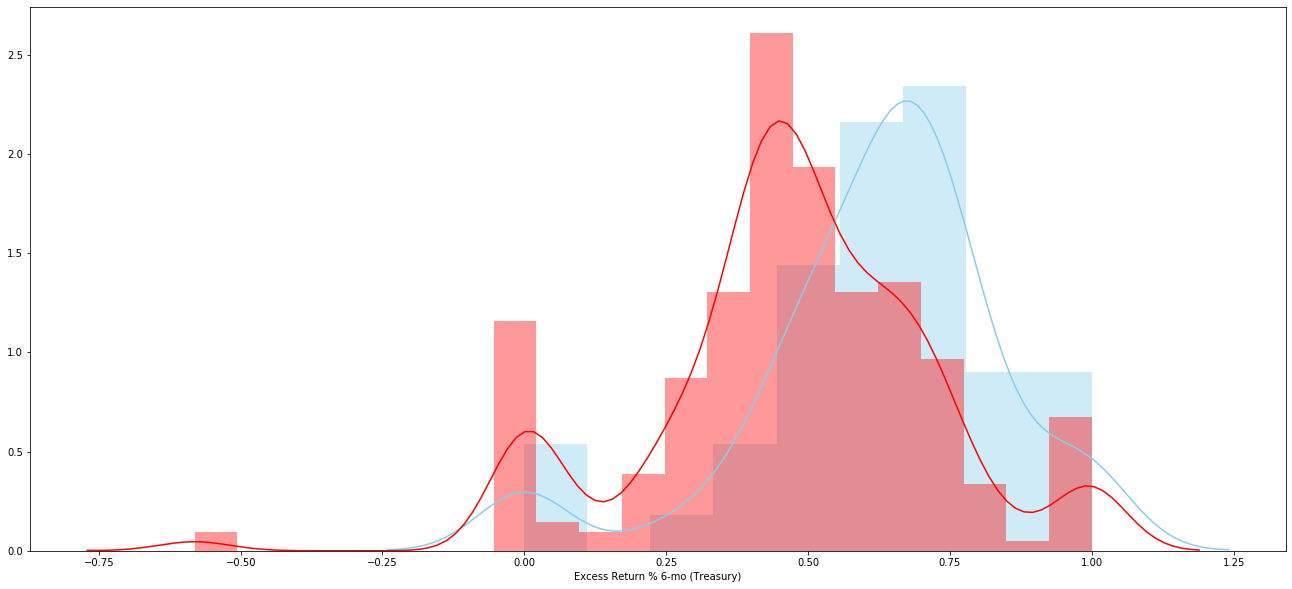

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 6-mo (Treasury)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['Excess Return % 6-mo (Agg)'], df1['Excess Return % 6-mo (Agg)'])

des,res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0  Excess Return % 6-mo (Agg)   50.0  0.504229  0.167108  0.023633   0.456737   
 1  Excess Return % 6-mo (Agg)  275.0  0.492462  0.194628  0.011736   0.469357   
 2                    combined  325.0  0.494272  0.190461  0.010565   0.473488   
 
    Interval  
 0  0.551720  
 1  0.515567  
 2  0.515057  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 6-mo (Agg) - Exces...    0.0118
 1                              Degrees of freedom =   323.0000
 2                                               t =     0.4013
 3                           Two side test p value =     0.6884
 4                          Difference < 0 p value =     0.6558
 5                          Difference > 0 p value =     0.3442
 6                                       Cohen's d =     0.0617
 7                                       Hedge's g =     0.0616
 8                               

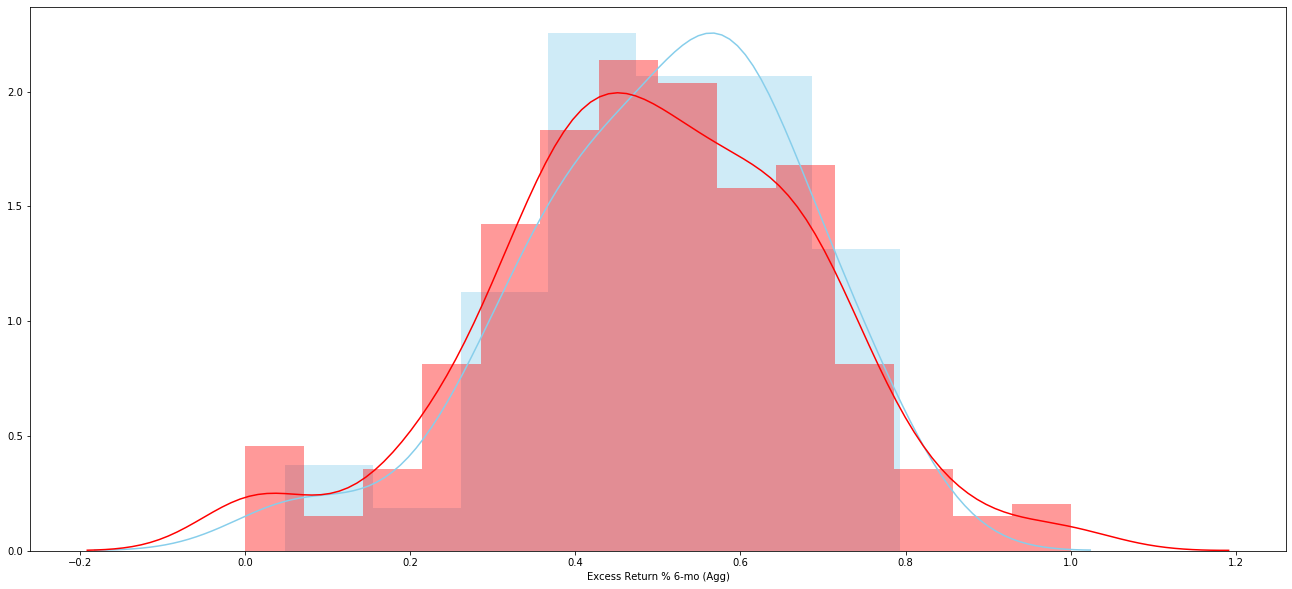

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 6-mo (Agg)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['Excess Return % 9-mo (Treasury)'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0  Excess Return % 9-mo (Treasury)   50.0  0.635122  0.221827  0.031371   
 1  Excess Return % 9-mo (Treasury)  272.0  0.480718  0.242491  0.014703   
 2                         combined  322.0  0.504694  0.245542  0.013684   
 
    95% Conf.  Interval  
 0   0.572080  0.698165  
 1   0.451771  0.509665  
 2   0.477773  0.531615  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 9-mo (Treasury) - ...    0.1544
 1                              Degrees of freedom =   320.0000
 2                                               t =     4.1908
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.6448
 7                                       Hedge's g =     0.6433
 8           

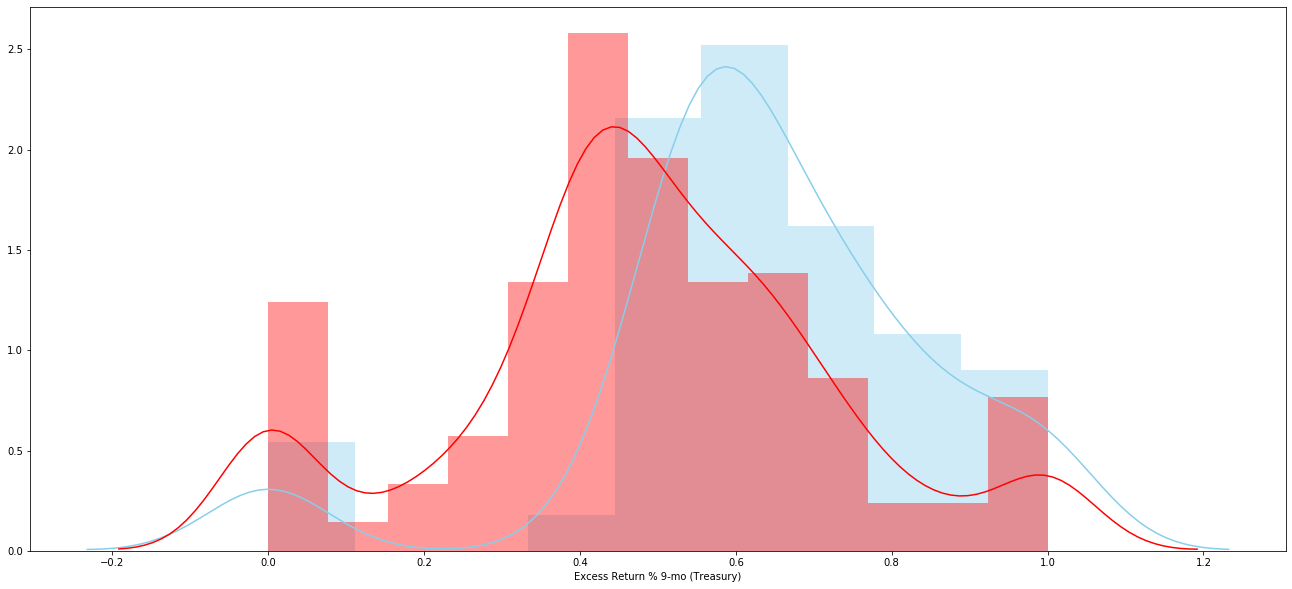

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['Excess Return % 9-mo (Agg)'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0  Excess Return % 9-mo (Agg)   50.0  0.510406  0.174169  0.024631   0.460908   
 1  Excess Return % 9-mo (Agg)  272.0  0.500017  0.212772  0.012901   0.474618   
 2                    combined  322.0  0.501630  0.207038  0.011538   0.478931   
 
    Interval  
 0  0.559904  
 1  0.525416  
 2  0.524330  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 9-mo (Agg) - Exces...    0.0104
 1                              Degrees of freedom =   320.0000
 2                                               t =     0.3257
 3                           Two side test p value =     0.7449
 4                          Difference < 0 p value =     0.6275
 5                          Difference > 0 p value =     0.3725
 6                                       Cohen's d =     0.0501
 7                                       Hedge's g =     0.0500
 8                               

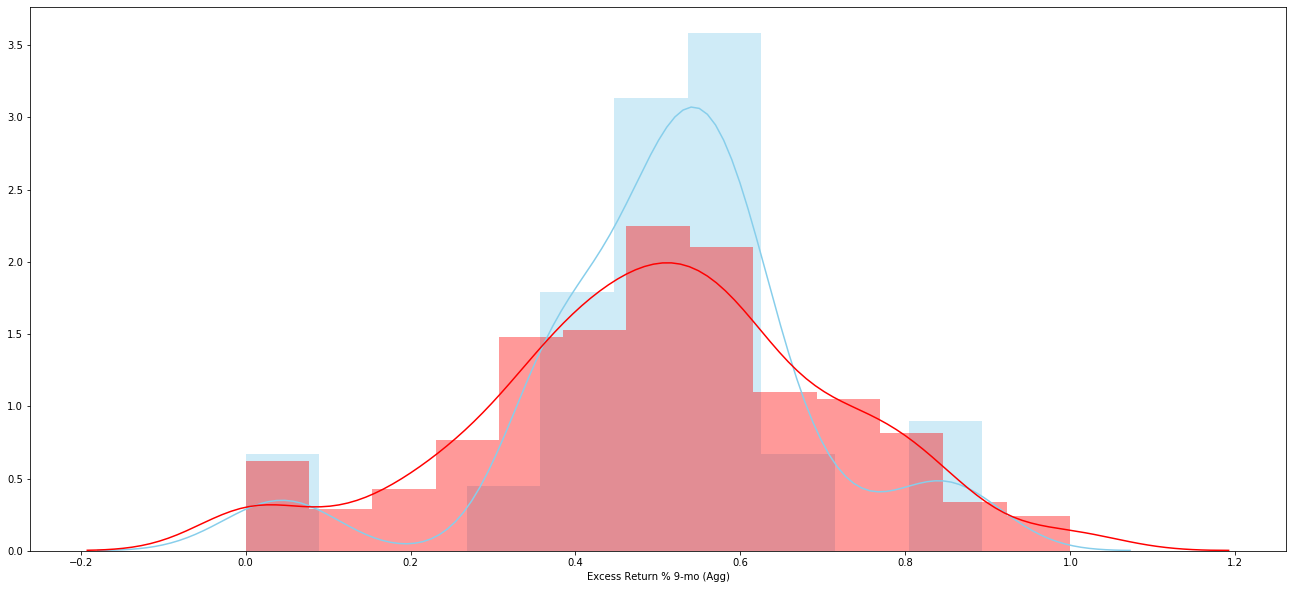

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['Excess Return % 12-mo (Treasury)'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0  Excess Return % 12-mo (Treasury)   50.0  0.629262  0.230749  0.032633   
 1  Excess Return % 12-mo (Treasury)  269.0  0.489680  0.246996  0.015060   
 2                          combined  319.0  0.511558  0.249404  0.013964   
 
    95% Conf.  Interval  
 0   0.563684  0.694840  
 1   0.460029  0.519330  
 2   0.484084  0.539031  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 12-mo (Treasury) -...    0.1396
 1                              Degrees of freedom =   317.0000
 2                                               t =     3.7061
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.5708
 7                                       Hedge's g =     0.5694
 8       

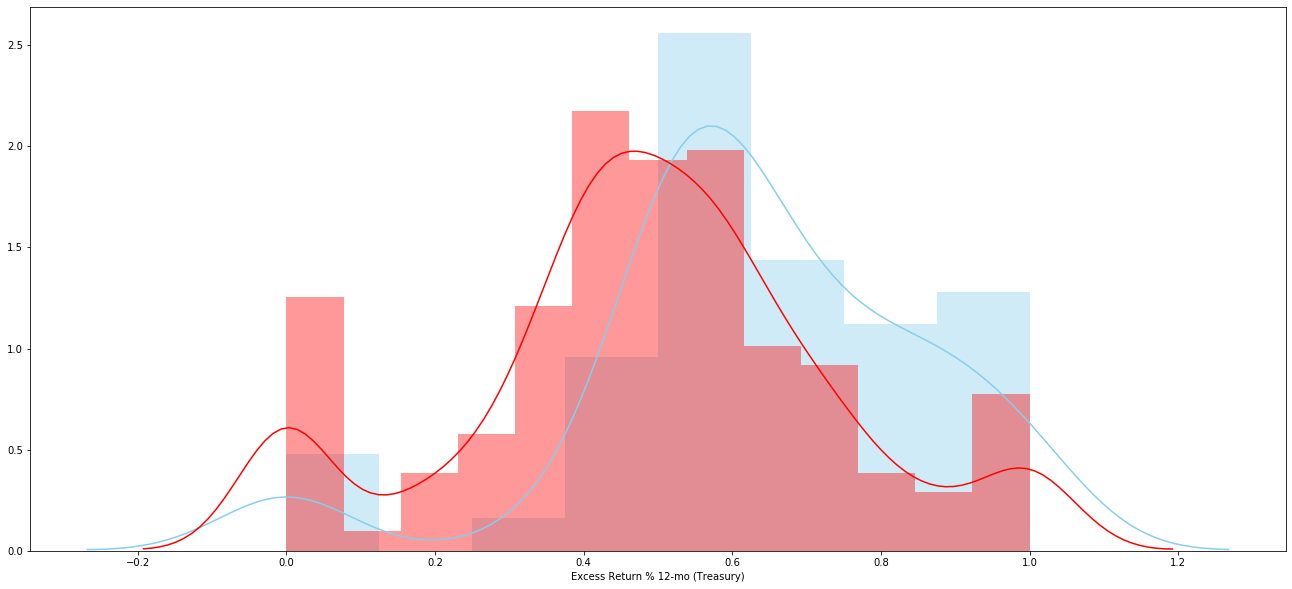

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['Excess Return % 12-mo (Agg)'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0  Excess Return % 12-mo (Agg)   50.0  0.494641  0.182911  0.025868   
 1  Excess Return % 12-mo (Agg)  269.0  0.492247  0.213931  0.013044   
 2                     combined  319.0  0.492622  0.209109  0.011708   
 
    95% Conf.  Interval  
 0   0.442659  0.546624  
 1   0.466566  0.517928  
 2   0.469588  0.515657  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 12-mo (Agg) - Exce...    0.0024
 1                              Degrees of freedom =   317.0000
 2                                               t =     0.0742
 3                           Two side test p value =     0.9409
 4                          Difference < 0 p value =     0.5296
 5                          Difference > 0 p value =     0.4704
 6                                       Cohen's d =     0.0114
 7                                       Hedge's g =     0.0114
 8                           

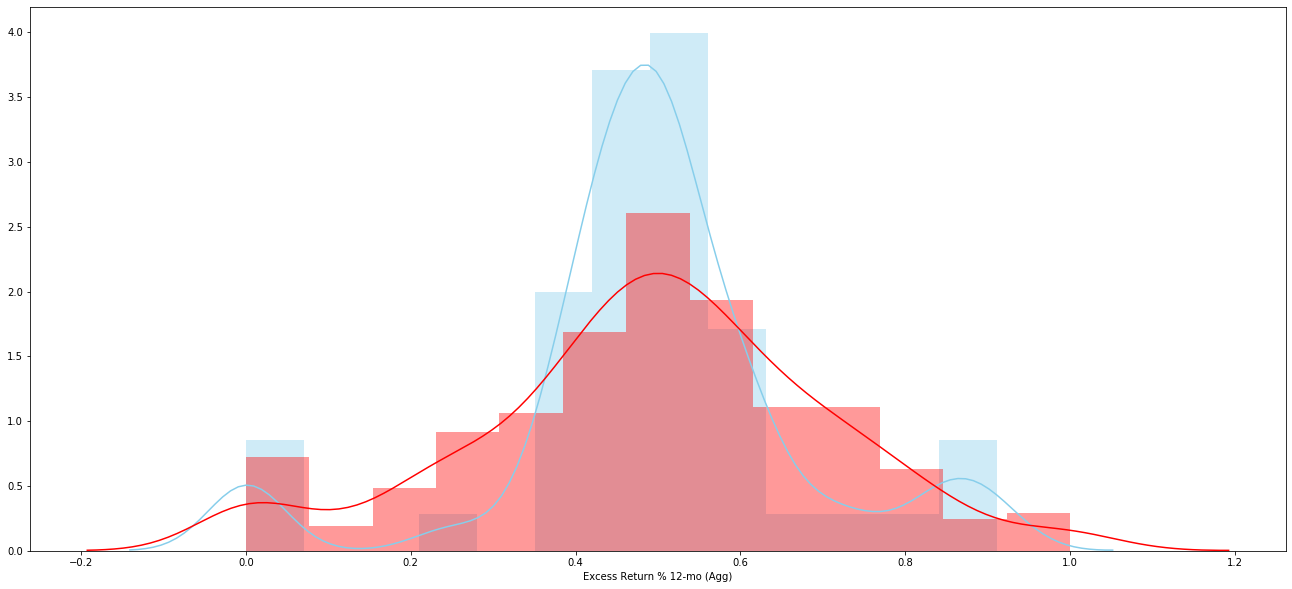

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['Excess Return % 24-mo (Treasury)'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0  Excess Return % 24-mo (Treasury)   50.0  0.570318  0.185639  0.026253   
 1  Excess Return % 24-mo (Treasury)  257.0  0.481544  0.244801  0.015270   
 2                          combined  307.0  0.496002  0.238184  0.013594   
 
    95% Conf.  Interval  
 0   0.517560  0.623076  
 1   0.451473  0.511615  
 2   0.469253  0.522752  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 24-mo (Treasury) -...    0.0888
 1                              Degrees of freedom =   305.0000
 2                                               t =     2.4306
 3                           Two side test p value =     0.0157
 4                          Difference < 0 p value =     0.9922
 5                          Difference > 0 p value =     0.0078
 6                                       Cohen's d =     0.3757
 7                                       Hedge's g =     0.3748
 8       

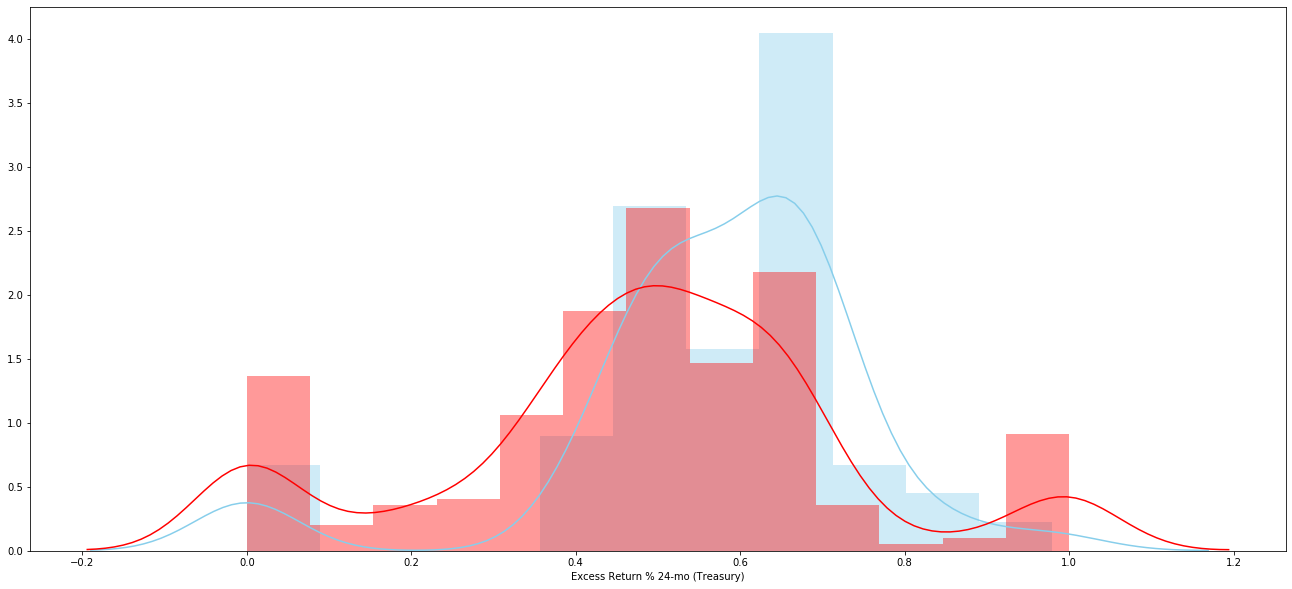

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['Excess Return % 24-mo (Agg)'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0  Excess Return % 24-mo (Agg)   50.0  0.437922  0.190455  0.026934   
 1  Excess Return % 24-mo (Agg)  257.0  0.484984  0.213747  0.013333   
 2                     combined  307.0  0.477319  0.210556  0.012017   
 
    95% Conf.  Interval  
 0   0.383796  0.492049  
 1   0.458727  0.511241  
 2   0.453673  0.500966  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 24-mo (Agg) - Exce...   -0.0471
 1                              Degrees of freedom =   305.0000
 2                                               t =    -1.4486
 3                           Two side test p value =     0.1485
 4                          Difference < 0 p value =     0.0742
 5                          Difference > 0 p value =     0.9258
 6                                       Cohen's d =    -0.2239
 7                                       Hedge's g =    -0.2234
 8                           

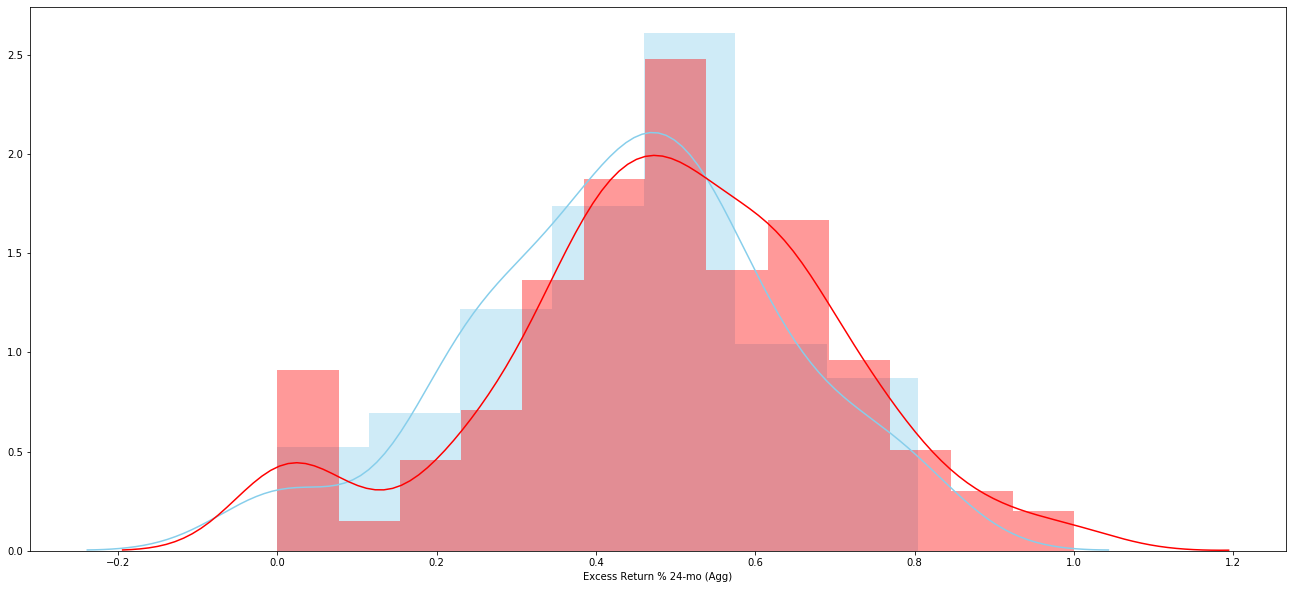

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['Excess Return % 36-mo (Treasury)'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0  Excess Return % 36-mo (Treasury)   50.0  0.629057  0.181546  0.025675   
 1  Excess Return % 36-mo (Treasury)  245.0  0.495937  0.269899  0.017243   
 2                          combined  295.0  0.518500  0.261635  0.015233   
 
    95% Conf.  Interval  
 0   0.577462  0.680652  
 1   0.461972  0.529901  
 2   0.488520  0.548479  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 36-mo (Treasury) -...    0.1331
 1                              Degrees of freedom =   293.0000
 2                                               t =     3.3347
 3                           Two side test p value =     0.0010
 4                          Difference < 0 p value =     0.9995
 5                          Difference > 0 p value =     0.0005
 6                                       Cohen's d =     0.5175
 7                                       Hedge's g =     0.5162
 8       

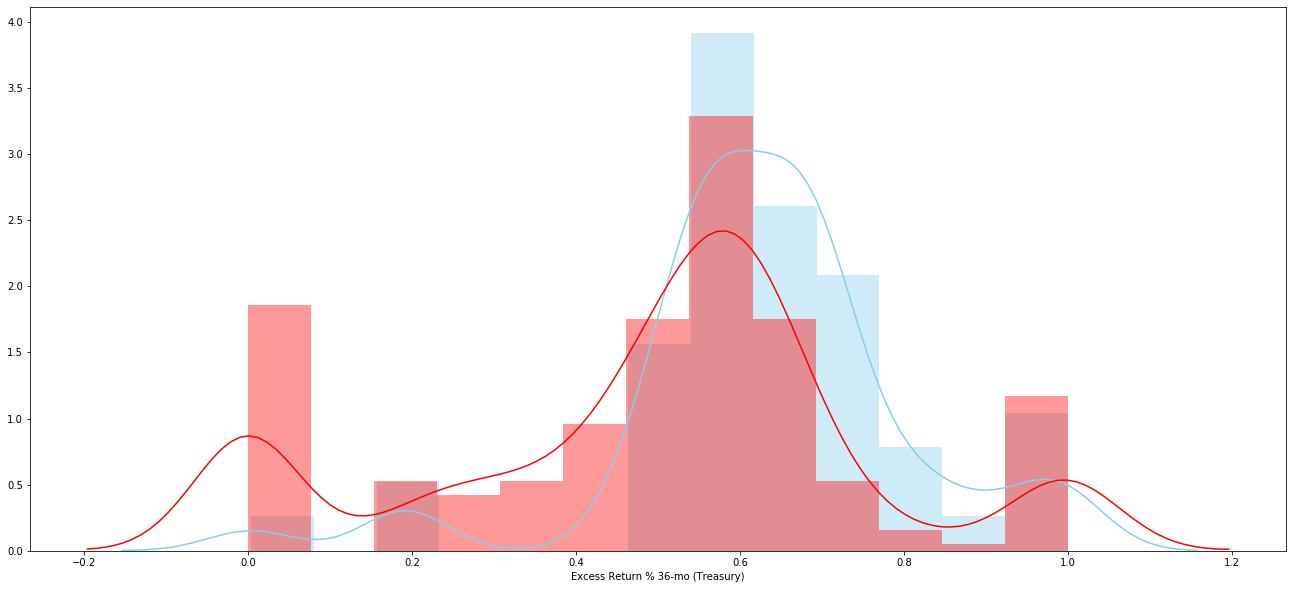

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['Excess Return % 36-mo (Agg)'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0  Excess Return % 36-mo (Agg)   50.0  0.503970  0.187579  0.026528   
 1  Excess Return % 36-mo (Agg)  245.0  0.532766  0.216243  0.013815   
 2                     combined  295.0  0.527885  0.211636  0.012322   
 
    95% Conf.  Interval  
 0   0.450660  0.557279  
 1   0.505554  0.559978  
 2   0.503635  0.552136  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 36-mo (Agg) - Exce...   -0.0288
 1                              Degrees of freedom =   293.0000
 2                                               t =    -0.8765
 3                           Two side test p value =     0.3815
 4                          Difference < 0 p value =     0.1907
 5                          Difference > 0 p value =     0.8093
 6                                       Cohen's d =    -0.1360
 7                                       Hedge's g =    -0.1357
 8                           

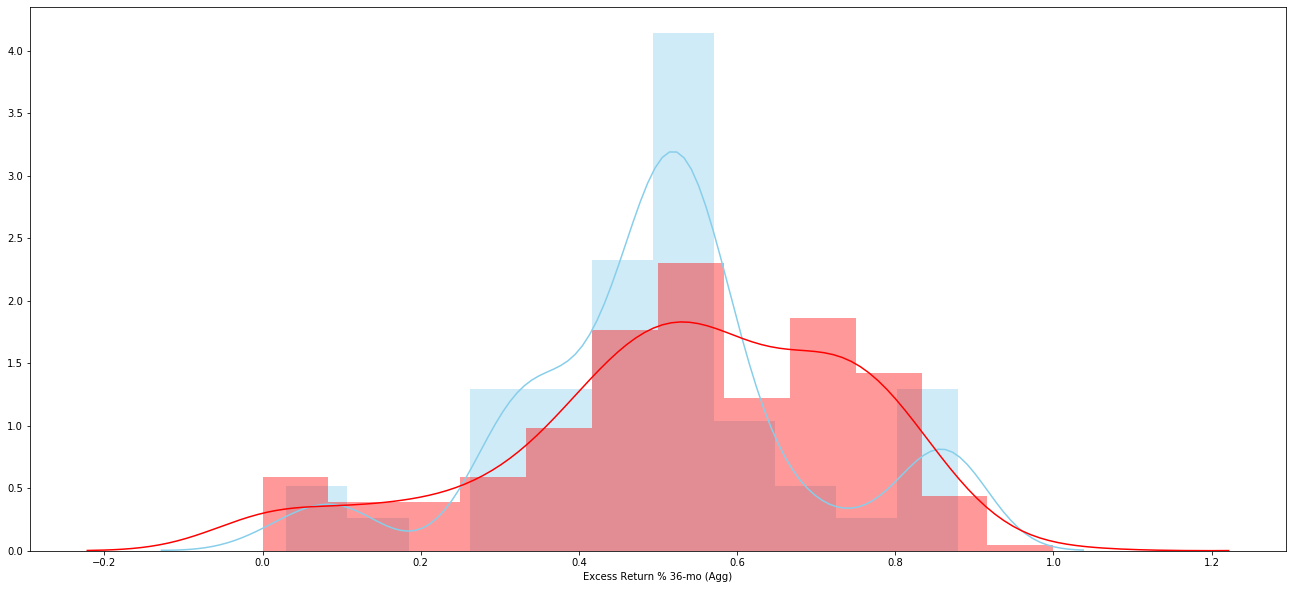

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")